In [43]:
# all the import modules bulk
# tensorflow, pandas, numpy... and other basics
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# keras and sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# import the yfinance module to import historical data
import yfinance as yf

In [2]:
# the historical data is imported using yfinance
# to parse the data, specific stock name needs to be keyed in (BTC-USD) is Bitcoin!
stock = yf.Ticker("BTC-USD") 
hist = stock.history(period = "5y") # data of BTC-USD (or tracked stock) for the last 5 years

# print test statement
hist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-10-06 00:00:00+00:00,4324.459961,4413.270020,4320.529785,4370.810059,1069939968,0,0
2017-10-07 00:00:00+00:00,4369.350098,4443.879883,4321.049805,4426.890137,906928000,0,0
2017-10-08 00:00:00+00:00,4429.669922,4624.140137,4405.640137,4610.479980,1313869952,0,0
2017-10-09 00:00:00+00:00,4614.520020,4878.709961,4564.250000,4772.020020,1968739968,0,0
2017-10-10 00:00:00+00:00,4776.209961,4922.169922,4765.100098,4781.990234,1597139968,0,0
2017-10-11 00:00:00+00:00,4789.250000,4873.729980,4751.629883,4826.479980,1222279936,0,0
2017-10-12 00:00:00+00:00,4829.580078,5446.910156,4822.000000,5446.910156,2791610112,0,0
2017-10-13 00:00:00+00:00,5464.160156,5840.299805,5436.850098,5647.209961,3615480064,0,0
2017-10-14 00:00:00+00:00,5643.529785,5837.700195,5591.640137,5831.790039,1669030016,0,0


In [3]:
# creation of training and testing dataset. 
# training -> first 80% of total data
stock_df = hist
d = 30
ahead = 10
n = int(hist.shape[0] * 0.8) # the row index that marks the 80% of df

training_set = stock_df.iloc[:n, 1:2].values # values 0 - n
test_set = stock_df.iloc[n:, 1:2].values # values n - end of df

# scale and reshape dataset
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

x_train = []
y_train = []

for i in range(d, n-ahead): 
    x_train.append(training_set_scaled[i-d:i, 0])
    y_train.append(training_set_scaled[i+ahead, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [37]:
# the model is defined (using LSTM layers from tf)
model = Sequential() # sequential model

# 1st layer + dropout regularisation
model.add(LSTM(units = 100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

# 2nd layer + dropout regularisation
model.add(LSTM(units = 100, return_sequences=True))
model.add(Dropout(0.2))

# 3rd layer + dropout regularisation
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

# 4th layer + dropout regularisation
model.add(LSTM(units = 50, return_sequences=False))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units = 1))

# compiling RNN 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting RNN to training set
model.fit(x_train, y_train, epochs = 50, batch_size = 32)


Epoch 1/50
45/45 [==============================] - 10s 41ms/step - loss: 0.0159
Epoch 2/50
45/45 [==============================] - 2s 39ms/step - loss: 0.0061
Epoch 3/50
45/45 [==============================] - 2s 39ms/step - loss: 0.0060
Epoch 4/50
45/45 [==============================] - 2s 38ms/step - loss: 0.0061
Epoch 5/50
45/45 [==============================] - 2s 39ms/step - loss: 0.0058
Epoch 6/50
45/45 [==============================] - 2s 43ms/step - loss: 0.0056
Epoch 7/50
45/45 [==============================] - 2s 42ms/step - loss: 0.0055
Epoch 8/50
45/45 [==============================] - 2s 42ms/step - loss: 0.0048
Epoch 9/50
45/45 [==============================] - 2s 42ms/step - loss: 0.0054
Epoch 10/50
45/45 [==============================] - 2s 44ms/step - loss: 0.0048
Epoch 11/50
45/45 [==============================] - 2s 43ms/step - loss: 0.0047
Epoch 12/50
45/45 [==============================] - 2s 44ms/step - loss: 0.0047
Epoch 13/50
45/45 [=================

In [39]:
# save the model
model.save("BTC-pred.h5")

# extract test data out of historical data
# take first 30 days as model input

dataset_train = stock_df.iloc[:n, 1:2]
dataset_test = stock_df.iloc[n:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - d:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

#print(inputs.shape)

# reshape test data
x_test = []
for i in range(d, inputs.shape[0]): 
    x_test.append(inputs[i-d:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

(366, 30, 1)


In [40]:
# predict test dataset
pred_stock_price = model.predict(x_test)
pred_stock_price = sc.inverse_transform(pred_stock_price)

stock_df['Date'] = stock_df.index
stock_df = stock_df.reset_index(drop = True)


12/12 [==============================] - 2s 15ms/step


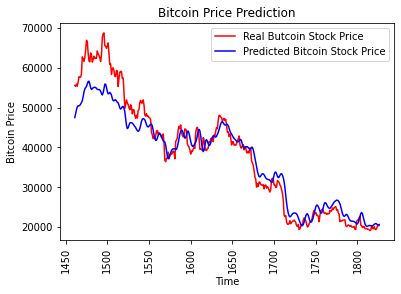

In [42]:
# make plot 
plt.plot(stock_df.loc[n:, 'Date'],dataset_test.values, color = 'red', label = 'Real Butcoin Stock Price')
plt.plot(stock_df.loc[n:, 'Date'],pred_stock_price, color = 'blue', label = 'Predicted Bitcoin Stock Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.xticks(rotation=90)
plt.show()